## Business Objective

A supermarket is offering a new line of organic products. The supermarket's management wants to determine which customers are likely to purchase these products.

The supermarket has a customer loyalty program. As an initial buyer incentive plan, the supermarket provided coupons for the organic products to all of the loyalty program participants and collected data that includes whether these customers purchased any of the organic products.

Although two target variables are listed, these exercises concentrate on the binary variable TargetBuy.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter('ignore')

import os
print(os.listdir("../input"))

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 120)

['organics.csv']


### Reading CSV file into Dataframe

In [2]:
df = pd.read_csv('../input/organics.csv')

### Quick checks on the dataset

In [3]:
df.shape

(22223, 15)

In [4]:
df.head()

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10,76,1,0.00%,4,0,0,16000.00
1,620,U,Midlands,Gold,35.0,D,Wales & West,4,49,1,0.00%,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0,0.01


In [5]:
df.columns

Index(['Customer Loyalty ID', 'Gender', 'Geographic Region', 'Loyalty Status',
       'Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level',
       'Television Region', 'Affluence Grade', 'Age', 'Frequency',
       'Frequency Percent', 'Loyalty Card Tenure', 'Organics Purchase Count',
       'Organics Purchase Indicator', 'Total Spend'],
      dtype='object')

In [6]:
df.describe()

,Customer Loyalty ID,Neigborhood Cluster-55 Level,Frequency,Organics Purchase Count,Organics Purchase Indicator,Total Spend
count,2.222300e+04,21549.000000,22223.0,22223.000000,22223.000000,22223.000000
mean,2.605540e+07,27.193652,1.0,0.294740,0.247716,4420.590041
std,1.507497e+07,15.751547,0.0,0.562831,0.431696,7559.047522
min,1.400000e+02,1.000000,1.0,0.000000,0.000000,0.010000
25%,1.169402e+07,14.000000,1.0,0.000000,0.000000,0.010000
50%,2.874879e+07,27.000000,1.0,0.000000,0.000000,2000.000000
75%,3.745402e+07,38.000000,1.0,0.000000,0.000000,6000.000000
max,5.285647e+07,55.000000,1.0,3.000000,1.000000,296313.850000


In [7]:
df.dtypes

Customer Loyalty ID               int64
Gender                           object
Geographic Region                object
Loyalty Status                   object
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level     object
Television Region                object
Affluence Grade                  object
Age                              object
Frequency                         int64
Frequency Percent                object
Loyalty Card Tenure              object
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

In [8]:
df.groupby('Gender').size()

Gender
F    12149
M     5815
U     1747
dtype: int64

### Checking unique values of some varibles

In [9]:
print('Gender',df['Gender'].unique())
print('Geographic Region',df['Geographic Region'].unique())
print('Loyalty Status',df['Loyalty Status'].unique())
print('Neighborhood Cluster-7 Level',df['Neighborhood Cluster-7 Level'].unique())
print('Television Region',df['Television Region'].unique())
print('Affluence Grade',df['Affluence Grade'].unique())
print('Age',df['Age'].unique())
print('Frequency Percent',df['Frequency Percent'].unique())
print('Loyalty Card Tenure',df['Loyalty Card Tenure'].unique())

Gender ['U' 'F' 'M' nan]
Geographic Region ['Midlands' 'North' nan 'South East' 'Scottish' 'South West']
Loyalty Status ['Gold' 'Silver' 'Tin' 'Platinum']
Neighborhood Cluster-7 Level ['C' 'D' 'F' 'A' 'B' 'E' nan 'U']
Television Region ['Wales & West' 'Midlands' 'N West' 'East' 'N East' nan 'London'
 'S & S East' 'C Scotland' 'Ulster' 'S West' 'Yorkshire' 'Border' 'N Scot']
Affluence Grade ['10' '4' '5' '11' '9' '13' '14' '7' '6' '16' '8' '.' '3' '15' '12' '19'
 '2' '17' '18' '20' '22' '26' '25' '24' '1' '21' '23' '27' '29' '30' '31'
 '0' '34' '28']
Age ['76' '49' '70' '65' '68' '72' '74' '62' '43' '60' '.' '51' '64' '37' '54'
 '42' '66' '46' '39' '75' '79' '50' '35' '71' '44' '31' '41' '58' '47'
 '61' '53' '57' '45' '55' '18' '56' '67' '78' '48' '52' '34' '40' '38'
 '77' '27' '36' '59' '63' '26' '69' '73' '33' '30' '29' '32' '22' '25'
 '28' '23' '20' '24' '19' '21']
Frequency Percent ['0.00%']
Loyalty Card Tenure ['4' '5' '8' '7' '3' '1' '2' '11' '9' '12' '23' '15' '6' '19' '24' '10'


### Converting unknown 'U' values to Nan

In [10]:
i = 0
for x in df['Gender']:
    if x == 'U':
        df.iloc[i, df.columns.get_loc('Gender')] = np.NaN
    i = i + 1

### Converting object to integer value if failed then converting to Nan

In [11]:
i = 0
for x in df['Affluence Grade']:
    try:
        df.iloc[i, df.columns.get_loc('Affluence Grade')] = int(x)
    except:
        df.iloc[i, df.columns.get_loc('Affluence Grade')] = np.NaN
    finally:
        i = i + 1

In [12]:
i = 0
for x in df['Age']:
    try:
        df.iloc[i, df.columns.get_loc('Age')] = int(x)
    except:
        df.iloc[i, df.columns.get_loc('Age')] = np.NaN
    finally:
        i = i + 1

In [13]:
i = 0
for x in df['Loyalty Card Tenure']:
    try:
        df.iloc[i, df.columns.get_loc('Loyalty Card Tenure')] = int(x)
    except:
        df.iloc[i, df.columns.get_loc('Loyalty Card Tenure')] = np.NaN
    finally:
        i = i + 1

### Check again to see all unknown values converted to Nan

In [14]:
print('Gender',df['Gender'].unique())
print('Geographic Region',df['Geographic Region'].unique())
print('Loyalty Status',df['Loyalty Status'].unique())
print('Neighborhood Cluster-7 Level',df['Neighborhood Cluster-7 Level'].unique())
print('Television Region',df['Television Region'].unique())
print('Affluence Grade',df['Affluence Grade'].unique())
print('Age',df['Age'].unique())
print('Frequency Percent',df['Frequency Percent'].unique())
print('Loyalty Card Tenure',df['Loyalty Card Tenure'].unique())

Gender [nan 'F' 'M']
Geographic Region ['Midlands' 'North' nan 'South East' 'Scottish' 'South West']
Loyalty Status ['Gold' 'Silver' 'Tin' 'Platinum']
Neighborhood Cluster-7 Level ['C' 'D' 'F' 'A' 'B' 'E' nan 'U']
Television Region ['Wales & West' 'Midlands' 'N West' 'East' 'N East' nan 'London'
 'S & S East' 'C Scotland' 'Ulster' 'S West' 'Yorkshire' 'Border' 'N Scot']
Affluence Grade [10 4 5 11 9 13 14 7 6 16 8 nan 3 15 12 19 2 17 18 20 22 26 25 24 1 21 23
 27 29 30 31 0 34 28]
Age [76 49 70 65 68 72 74 62 43 60 nan 51 64 37 54 42 66 46 39 75 79 50 35 71
 44 31 41 58 47 61 53 57 45 55 18 56 67 78 48 52 34 40 38 77 27 36 59 63
 26 69 73 33 30 29 32 22 25 28 23 20 24 19 21]
Frequency Percent ['0.00%']
Loyalty Card Tenure [4 5 8 7 3 1 2 11 9 12 23 15 6 19 24 10 29 17 nan 0 18 13 32 27 22 30 14
 20 16 31 28 21 25 26 36 35 33 39 38 34]


### Check number of Nan in all variables

In [15]:
df.isnull().any()
df.isnull().sum(axis=0)

Customer Loyalty ID                0
Gender                          4259
Geographic Region                465
Loyalty Status                     0
Neigborhood Cluster-55 Level     674
Neighborhood Cluster-7 Level     674
Television Region                465
Affluence Grade                 1085
Age                             1508
Frequency                          0
Frequency Percent                  0
Loyalty Card Tenure              281
Organics Purchase Count            0
Organics Purchase Indicator        0
Total Spend                        0
dtype: int64

### Remove rows with Nan values from 'Gender','Age' and 'Affluence Grade'

In [16]:
df.dropna(subset=['Gender','Age','Affluence Grade'],inplace=True)

In [17]:
df.isnull().any()
df.isnull().sum(axis=0)

Customer Loyalty ID               0
Gender                            0
Geographic Region               333
Loyalty Status                    0
Neigborhood Cluster-55 Level    489
Neighborhood Cluster-7 Level    489
Television Region               333
Affluence Grade                   0
Age                               0
Frequency                         0
Frequency Percent                 0
Loyalty Card Tenure             197
Organics Purchase Count           0
Organics Purchase Indicator       0
Total Spend                       0
dtype: int64

In [18]:
df.shape

(15927, 15)

In [19]:
col_name = df.columns
col_name

Index(['Customer Loyalty ID', 'Gender', 'Geographic Region', 'Loyalty Status',
       'Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level',
       'Television Region', 'Affluence Grade', 'Age', 'Frequency',
       'Frequency Percent', 'Loyalty Card Tenure', 'Organics Purchase Count',
       'Organics Purchase Indicator', 'Total Spend'],
      dtype='object')

### Replace the rest of missing value with 'most_frequent' in SimpleImputer

### Without imputing 'Gender','Age' and 'Affluence Grade' is to prevent data bias to certain value

In [20]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
temp_arr = imp.fit_transform(df)

### Convert back to Dataframe

In [21]:
df2 = pd.DataFrame.from_records(data=temp_arr,columns=col_name)

In [22]:
df2.sample(10)

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
9368,31666090,F,North,Tin,34.0,D,N West,5,31,1,0.00%,5,0,0,0.01
7822,28377621,M,South West,Tin,8.0,B,S West,7,64,1,0.00%,8,0,0,0.01
11345,35571450,F,North,Gold,52.0,F,Yorkshire,5,67,1,0.00%,5,0,0,7500.00
15748,52443504,M,North,Silver,17.0,C,N East,14,51,1,0.00%,8,0,0,300.00
9684,32735550,F,Midlands,Silver,35.0,D,Midlands,10,32,1,0.00%,8,1,1,3000.00
7628,27656594,F,Midlands,Silver,18.0,C,East,10,40,1,0.00%,4,0,0,420.00
15203,50151093,F,North,Tin,30.0,D,N West,13,29,1,0.00%,5,1,1,0.01
12272,38631900,M,Midlands,Gold,38.0,E,East,14,68,1,0.00%,6,0,0,8000.00
4481,13227785,M,North,Silver,12.0,B,N West,7,58,1,0.00%,8,0,0,50.01
14269,46438850,F,Midlands,Tin,16.0,C,Midlands,10,38,1,0.00%,4,1,1,0.01


### Check for Nan value again

In [23]:
df2.isnull().any()
df2.isnull().sum(axis=0)

Customer Loyalty ID             0
Gender                          0
Geographic Region               0
Loyalty Status                  0
Neigborhood Cluster-55 Level    0
Neighborhood Cluster-7 Level    0
Television Region               0
Affluence Grade                 0
Age                             0
Frequency                       0
Frequency Percent               0
Loyalty Card Tenure             0
Organics Purchase Count         0
Organics Purchase Indicator     0
Total Spend                     0
dtype: int64

In [24]:
print('Gender',df2['Gender'].unique())
print('Geographic Region',df2['Geographic Region'].unique())
print('Loyalty Status',df2['Loyalty Status'].unique())
print('Neighborhood Cluster-7 Level',df2['Neighborhood Cluster-7 Level'].unique())
print('Television Region',df2['Television Region'].unique())
print('Affluence Grade',df2['Affluence Grade'].unique())
print('Age',df2['Age'].unique())
print('Frequency Percent',df2['Frequency Percent'].unique())
print('Loyalty Card Tenure',df2['Loyalty Card Tenure'].unique())

Gender ['F' 'M']
Geographic Region ['Midlands' 'North' 'South East' 'South West' 'Scottish']
Loyalty Status ['Silver' 'Tin' 'Gold' 'Platinum']
Neighborhood Cluster-7 Level ['D' 'F' 'A' 'C' 'B' 'E' 'U']
Television Region ['Wales & West' 'Midlands' 'East' 'N East' 'London' 'S & S East' 'Ulster'
 'N West' 'S West' 'Yorkshire' 'Border' 'C Scotland' 'N Scot']
Affluence Grade [ 5 10 11 13 14  7  9  6 16  8  3 15 12 19  4  2 17 18 20 22 26 25 24  1
 21 23 27 29 30 31  0 34 28]
Age [70 65 68 74 62 43 60 51 64 37 54 66 46 39 75 49 50 35 71 44 42 31 72 41
 58 47 76 61 57 45 55 18 78 48 53 67 52 34 40 79 38 27 36 56 26 63 69 33
 30 29 59 73 77 22 25 28 32 23 20 24 19 21]
Frequency Percent ['0.00%']
Loyalty Card Tenure [ 8  7  5  3  1  2 11  9  4 12 15  6 19 24 10 17  0 32 22 27 30 13 20 16
 31 28 18 23 29 21 14 25 26 36 35 33 38 34]


### Rename target column to 'ORGANICS'

In [25]:
df2.rename(inplace=True, columns={'Organics Purchase Indicator': 'ORGANICS'}) 
df2.columns

Index(['Customer Loyalty ID', 'Gender', 'Geographic Region', 'Loyalty Status',
       'Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level',
       'Television Region', 'Affluence Grade', 'Age', 'Frequency',
       'Frequency Percent', 'Loyalty Card Tenure', 'Organics Purchase Count',
       'ORGANICS', 'Total Spend'],
      dtype='object')

### Take a quick look into the dataset using charts

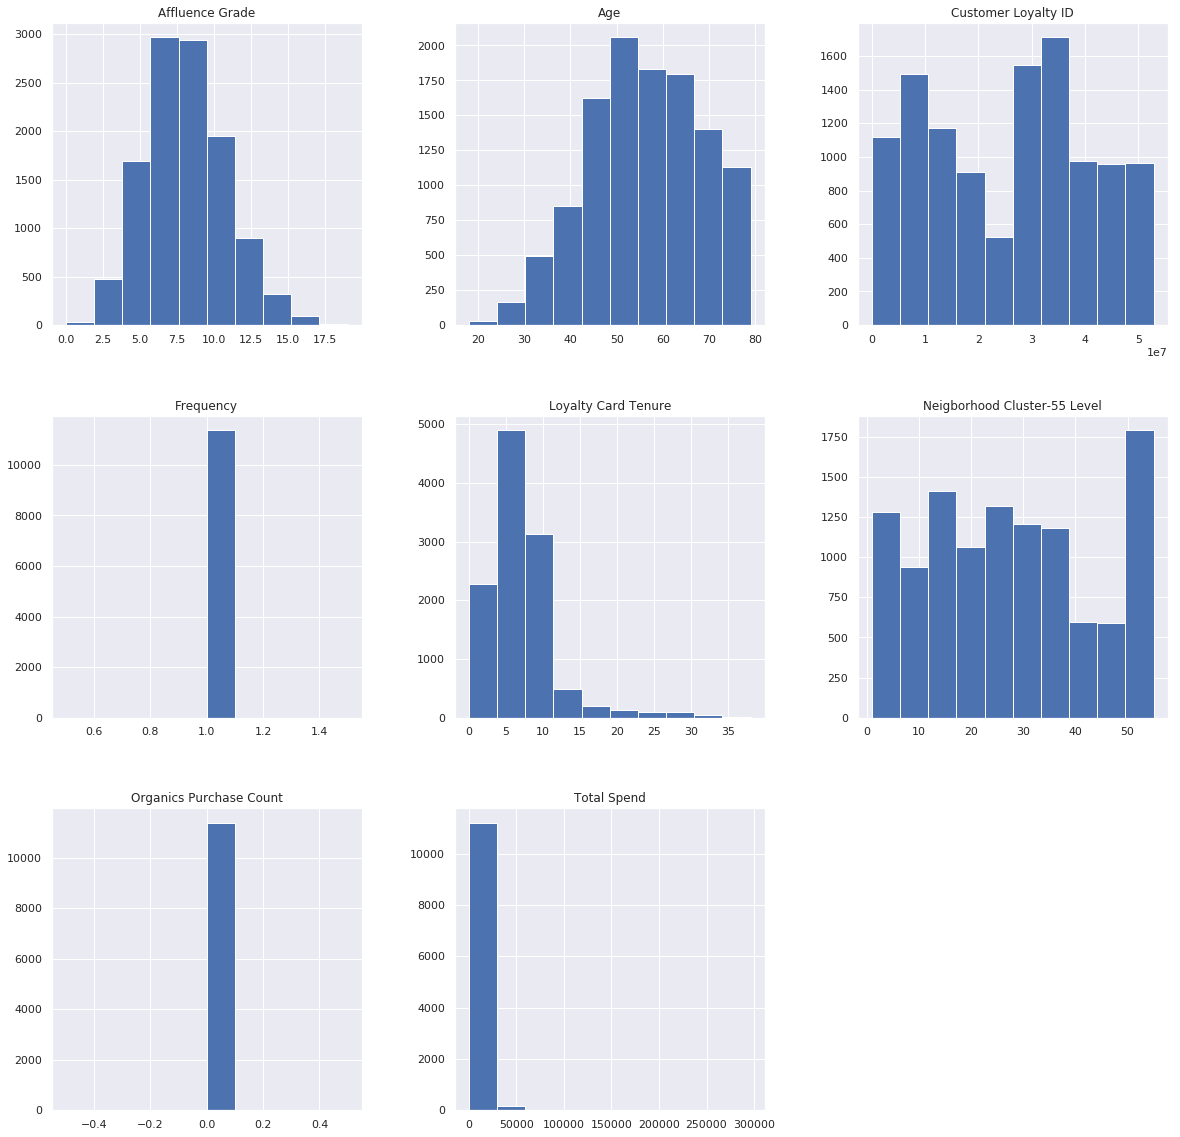

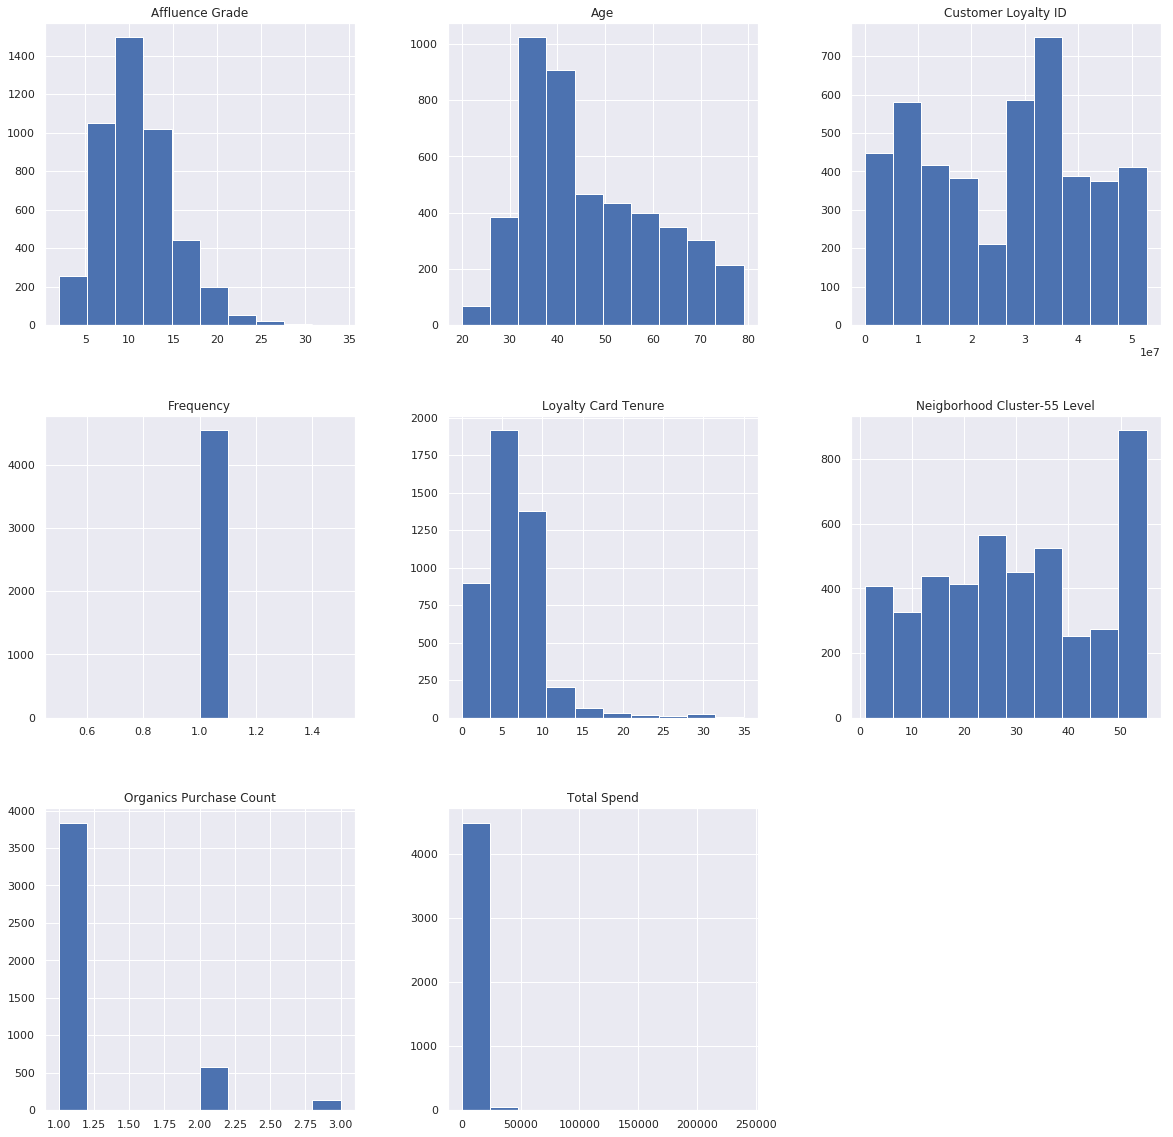

In [26]:
df2.groupby('ORGANICS').hist(figsize=(20,20))
plt.show()
plt.close()

### Drop customer ID column and reject column

In [27]:
df2.drop(['Customer Loyalty ID','Organics Purchase Count'], axis=1, inplace=True)
df2.head()

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,ORGANICS,Total Spend
0,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,0.02
1,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,0.01
2,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0.01
3,F,Midlands,Tin,3.0,A,East,11,74,1,0.00%,8,0,0.01
4,M,North,Tin,32.0,D,N East,13,62,1,0.00%,5,0,0.01


### Drop columns with only 1 value

In [28]:
df2.drop(['Frequency','Frequency Percent'], axis=1, inplace=True)
df2.head()

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Loyalty Card Tenure,ORGANICS,Total Spend
0,F,Midlands,Silver,27.0,D,Wales & West,5,70,8,1,0.02
1,M,Midlands,Tin,51.0,F,Midlands,10,65,7,1,0.01
2,F,Midlands,Tin,4.0,A,Midlands,11,68,8,0,0.01
3,F,Midlands,Tin,3.0,A,East,11,74,8,0,0.01
4,M,North,Tin,32.0,D,N East,13,62,5,0,0.01


In [29]:
df2.dtypes

Gender                           object
Geographic Region                object
Loyalty Status                   object
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level     object
Television Region                object
Affluence Grade                   int64
Age                               int64
Loyalty Card Tenure               int64
ORGANICS                          int64
Total Spend                     float64
dtype: object

### Get dummy variables for all categorical columns

In [30]:
df3 = pd.get_dummies(data=df2, columns=['Gender','Geographic Region','Loyalty Status',
                                        'Neighborhood Cluster-7 Level','Television Region'])

### Take a look at new format dataset

In [31]:
df3.shape

(15927, 37)

In [32]:
df3.head()

,Neigborhood Cluster-55 Level,Affluence Grade,Age,Loyalty Card Tenure,ORGANICS,Total Spend,Gender_F,Gender_M,Geographic Region_Midlands,Geographic Region_North,Geographic Region_Scottish,Geographic Region_South East,Geographic Region_South West,Loyalty Status_Gold,Loyalty Status_Platinum,Loyalty Status_Silver,Loyalty Status_Tin,Neighborhood Cluster-7 Level_A,Neighborhood Cluster-7 Level_B,Neighborhood Cluster-7 Level_C,Neighborhood Cluster-7 Level_D,Neighborhood Cluster-7 Level_E,Neighborhood Cluster-7 Level_F,Neighborhood Cluster-7 Level_U,Television Region_Border,Television Region_C Scotland,Television Region_East,Television Region_London,Television Region_Midlands,Television Region_N East,Television Region_N Scot,Television Region_N West,Television Region_S & S East,Television Region_S West,Television Region_Ulster,Television Region_Wales & West,Television Region_Yorkshire
0,27.0,5,70,8,1,0.02,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,51.0,10,65,7,1,0.01,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,4.0,11,68,8,0,0.01,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3.0,11,74,8,0,0.01,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,32.0,13,62,5,0,0.01,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
df3.columns

Index(['Neigborhood Cluster-55 Level', 'Affluence Grade', 'Age',
       'Loyalty Card Tenure', 'ORGANICS', 'Total Spend', 'Gender_F',
       'Gender_M', 'Geographic Region_Midlands', 'Geographic Region_North',
       'Geographic Region_Scottish', 'Geographic Region_South East',
       'Geographic Region_South West', 'Loyalty Status_Gold',
       'Loyalty Status_Platinum', 'Loyalty Status_Silver',
       'Loyalty Status_Tin', 'Neighborhood Cluster-7 Level_A',
       'Neighborhood Cluster-7 Level_B', 'Neighborhood Cluster-7 Level_C',
       'Neighborhood Cluster-7 Level_D', 'Neighborhood Cluster-7 Level_E',
       'Neighborhood Cluster-7 Level_F', 'Neighborhood Cluster-7 Level_U',
       'Television Region_Border', 'Television Region_C Scotland',
       'Television Region_East', 'Television Region_London',
       'Television Region_Midlands', 'Television Region_N East',
       'Television Region_N Scot', 'Television Region_N West',
       'Television Region_S & S East', 'Television Regio

### Move the 'ORGANICS' to the last column

In [34]:
df3 = df3[['Neigborhood Cluster-55 Level', 'Affluence Grade', 'Age',
       'Loyalty Card Tenure', 'Total Spend', 'Gender_F',
       'Gender_M', 'Geographic Region_Midlands', 'Geographic Region_North',
       'Geographic Region_Scottish', 'Geographic Region_South East',
       'Geographic Region_South West', 'Loyalty Status_Gold',
       'Loyalty Status_Platinum', 'Loyalty Status_Silver',
       'Loyalty Status_Tin', 'Neighborhood Cluster-7 Level_A',
       'Neighborhood Cluster-7 Level_B', 'Neighborhood Cluster-7 Level_C',
       'Neighborhood Cluster-7 Level_D', 'Neighborhood Cluster-7 Level_E',
       'Neighborhood Cluster-7 Level_F', 'Neighborhood Cluster-7 Level_U',
       'Television Region_Border', 'Television Region_C Scotland',
       'Television Region_East', 'Television Region_London',
       'Television Region_Midlands', 'Television Region_N East',
       'Television Region_N Scot', 'Television Region_N West',
       'Television Region_S & S East', 'Television Region_S West',
       'Television Region_Ulster', 'Television Region_Wales & West',
       'Television Region_Yorkshire','ORGANICS']]

In [35]:
df3.head()

,Neigborhood Cluster-55 Level,Affluence Grade,Age,Loyalty Card Tenure,Total Spend,Gender_F,Gender_M,Geographic Region_Midlands,Geographic Region_North,Geographic Region_Scottish,Geographic Region_South East,Geographic Region_South West,Loyalty Status_Gold,Loyalty Status_Platinum,Loyalty Status_Silver,Loyalty Status_Tin,Neighborhood Cluster-7 Level_A,Neighborhood Cluster-7 Level_B,Neighborhood Cluster-7 Level_C,Neighborhood Cluster-7 Level_D,Neighborhood Cluster-7 Level_E,Neighborhood Cluster-7 Level_F,Neighborhood Cluster-7 Level_U,Television Region_Border,Television Region_C Scotland,Television Region_East,Television Region_London,Television Region_Midlands,Television Region_N East,Television Region_N Scot,Television Region_N West,Television Region_S & S East,Television Region_S West,Television Region_Ulster,Television Region_Wales & West,Television Region_Yorkshire,ORGANICS
0,27.0,5,70,8,0.02,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,51.0,10,65,7,0.01,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,4.0,11,68,8,0.01,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3.0,11,74,8,0.01,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,32.0,13,62,5,0.01,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Build a list with all models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

### Convert Dataframe to X and Y data for modeling

In [37]:
features = df3.columns[:-1]
x_m = df3[features]
y_m = df3.ORGANICS

### Split dataset for modeling and final testing

In [38]:
from sklearn.model_selection import train_test_split

X_F_TRAIN, X_F_TEST, Y_F_TRAIN, Y_F_TEST = train_test_split(
    x_m, y_m, test_size=0.2, stratify = y_m, random_state=42)

### This section is doing features selection using LogisticRegression() and with selected features then pump into different models to get best result

In [39]:
main_df = pd.DataFrame(columns=['Num_Of_Feature','Features_Sel','KNN','SVM','LR','DT','GNB','RF','GB'])
model_feat = LogisticRegression()

s_highest = 0

for n in range(3,38):
    print("Running selecting ", n ," features to run on all models..." )
    rfe = RFE(model_feat, n)
    fit = rfe.fit(X_F_TRAIN, Y_F_TRAIN)
    
    features_sel = []
    for sel, col in zip((fit.support_),features):
        if sel == True:
            features_sel.append(col)
    
    x = X_F_TRAIN[(features_sel)]
    y = Y_F_TRAIN

    x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify = y, random_state=42)
    
    names = []
    scores = []
    for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        names.append(name)
        if score > s_highest:
            s_highest = score
            f_highest = features_sel
            n_highest = name
            m_highest = model
            
    main_df = main_df.append({'Num_Of_Feature':n,
                              'Features_Sel':(", ".join(features_sel)),
                              names[0]:scores[0],
                              names[1]:scores[1],
                              names[2]:scores[2],
                              names[3]:scores[3],
                              names[4]:scores[4],
                              names[5]:scores[5],
                              names[6]:scores[6]},
                             ignore_index=True)

#print('The highest score is',s_highest,'with these features',f_highest,'on model',n_highest)

Running selecting  3  features to run on all models...
Running selecting  4  features to run on all models...
Running selecting  5  features to run on all models...
Running selecting  6  features to run on all models...
Running selecting  7  features to run on all models...
Running selecting  8  features to run on all models...
Running selecting  9  features to run on all models...
Running selecting  10  features to run on all models...
Running selecting  11  features to run on all models...
Running selecting  12  features to run on all models...
Running selecting  13  features to run on all models...
Running selecting  14  features to run on all models...
Running selecting  15  features to run on all models...
Running selecting  16  features to run on all models...
Running selecting  17  features to run on all models...
Running selecting  18  features to run on all models...
Running selecting  19  features to run on all models...
Running selecting  20  features to run on all models...

### Plot a graph with all models with the range of feature selected

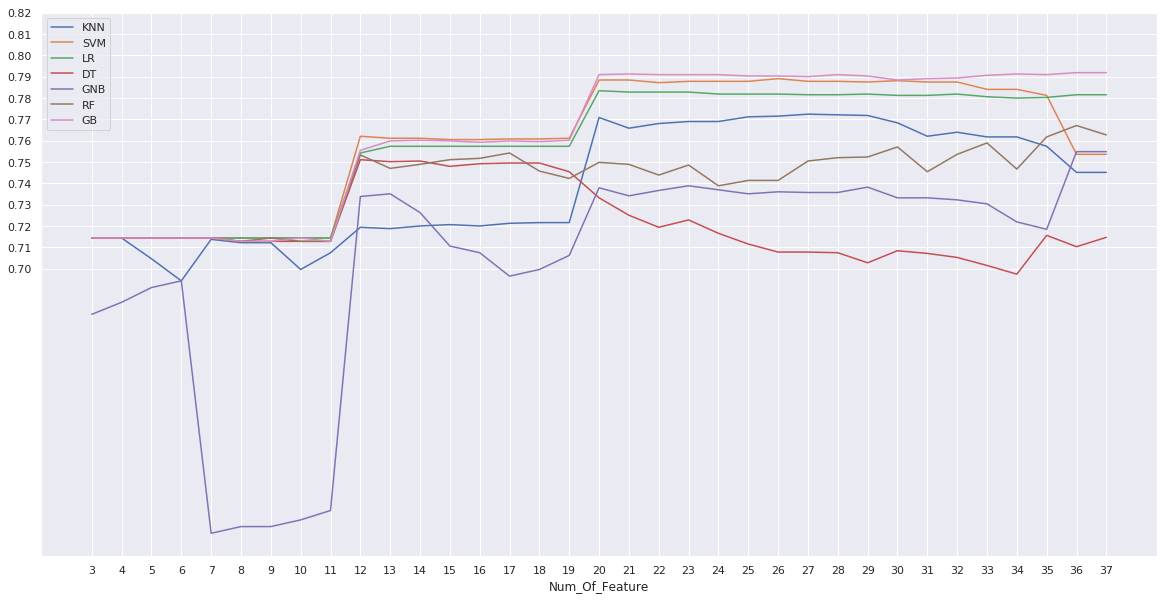

In [40]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
main_df.plot(kind='line',x='Num_Of_Feature',y='KNN',ax=ax)
main_df.plot(kind='line',x='Num_Of_Feature',y='SVM',ax=ax)
main_df.plot(kind='line',x='Num_Of_Feature',y='LR',ax=ax)
main_df.plot(kind='line',x='Num_Of_Feature',y='DT',ax=ax)
main_df.plot(kind='line',x='Num_Of_Feature',y='GNB',ax=ax)
main_df.plot(kind='line',x='Num_Of_Feature',y='RF',ax=ax)
main_df.plot(kind='line',x='Num_Of_Feature',y='GB',ax=ax)

ax.set_xticks(np.arange(3, 38, step=1.0))
ax.set_yticks(np.arange(0.70, 0.83, step=0.01))

plt.show()
plt.close()

In [41]:
main_df

,Num_Of_Feature,Features_Sel,KNN,SVM,LR,DT,GNB,RF,GB
0,3,"Gender_M, Loyalty Status_Platinum, Loyalty Status_Tin",0.714375,0.714375,0.714375,0.714375,0.678594,0.714375,0.714375
1,4,"Gender_M, Loyalty Status_Platinum, Loyalty Status_Tin, Television Region_N West",0.714375,0.714375,0.714375,0.714375,0.684244,0.714375,0.714375
2,5,"Gender_M, Loyalty Status_Platinum, Loyalty Status_Tin, Television Region_N West, Television Region_Yorkshire",0.704645,0.714375,0.714375,0.714375,0.691149,0.714375,0.714375
3,6,"Gender_M, Geographic Region_Scottish, Loyalty Status_Platinum, Loyalty Status_Tin, Television Region_N West, Televis...",0.694288,0.714375,0.714375,0.714375,0.694288,0.714375,0.714375
4,7,"Gender_F, Gender_M, Geographic Region_Scottish, Loyalty Status_Platinum, Loyalty Status_Tin, Television Region_N Wes...",0.713748,0.714375,0.714375,0.714375,0.575957,0.714375,0.714375
5,8,"Gender_F, Gender_M, Geographic Region_Scottish, Loyalty Status_Platinum, Loyalty Status_Tin, Television Region_N Wes...",0.712178,0.714375,0.714375,0.712806,0.579096,0.712806,0.712806
6,9,"Gender_F, Gender_M, Geographic Region_Scottish, Geographic Region_South East, Loyalty Status_Platinum, Loyalty Statu...",0.712178,0.714375,0.714375,0.712806,0.579096,0.714375,0.712806
7,10,"Gender_F, Gender_M, Geographic Region_Midlands, Geographic Region_Scottish, Geographic Region_South East, Loyalty St...",0.699623,0.714375,0.714375,0.712806,0.582235,0.712806,0.714375
8,11,"Gender_F, Gender_M, Geographic Region_Midlands, Geographic Region_North, Geographic Region_Scottish, Geographic Regi...",0.707470,0.714375,0.714375,0.712806,0.586629,0.712806,0.712806
9,12,"Affluence Grade, Gender_F, Gender_M, Geographic Region_Midlands, Geographic Region_North, Geographic Region_Scottish...",0.719397,0.762084,0.754237,0.751099,0.733836,0.753296,0.755493


### Will use number of features selected equal to 20 since after that it did not change much

In [42]:
strlist = list(main_df[main_df['Num_Of_Feature'] == 20]['Features_Sel'])

In [43]:
str1 = str(strlist)
str2 = str1[2:-2]
f_selected = str2.split(", ")
f_selected

['Affluence Grade',
 'Age',
 'Gender_F',
 'Gender_M',
 'Geographic Region_Midlands',
 'Geographic Region_North',
 'Geographic Region_Scottish',
 'Geographic Region_South East',
 'Loyalty Status_Platinum',
 'Loyalty Status_Tin',
 'Neighborhood Cluster-7 Level_F',
 'Neighborhood Cluster-7 Level_U',
 'Television Region_Border',
 'Television Region_C Scotland',
 'Television Region_N East',
 'Television Region_N West',
 'Television Region_S West',
 'Television Region_Ulster',
 'Television Region_Wales & West',
 'Television Region_Yorkshire']

### Split dataset for training and testing with Cross Validation

In [44]:
x = X_F_TRAIN[(f_selected)]
y = Y_F_TRAIN

x_train, x_test, y_train, y_test = train_test_split(
x, y, stratify = y, random_state=42)

### Perform tuning on selected model

In [45]:
model = m_highest
model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth":[3,5,8],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[100]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
# clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_iter=100, n_jobs=-1)

In [47]:
import datetime
#Starting time
print("Start time is",datetime.datetime.now())

#Beware: This line of code can takes hours to run depend of the parameters setting above 
clf.fit(x, y)

#Stop time
print("Stop time is",datetime.datetime.now())

Start time is 2019-04-02 01:41:28.197800
Stop time is 2019-04-02 01:49:32.544354


### Below show the best parameters selected and best estimator

In [48]:
print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [49]:
print(clf.best_estimator_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


### Below is the final score with the best model and parameters selected

In [50]:
final_score = cross_val_score(clf.best_estimator_, x, y, 
                              cv=10, scoring='accuracy').mean()
print("Final accuracy : {} ".format(final_score))

Final accuracy : 0.7965635862659767 


### Now we want to bring in unseen data to the model and test

In [51]:
model = clf.best_estimator_
x_train = X_F_TRAIN[(f_selected)]
y_train = Y_F_TRAIN

x_test = X_F_TEST[(f_selected)]
y_test = Y_F_TEST

### Accuracy for unseen data

In [52]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)

In [53]:
print("The accuracy for unseen data is",score)

The accuracy for unseen data is 0.7919020715630886


### Now we look into data for a few features

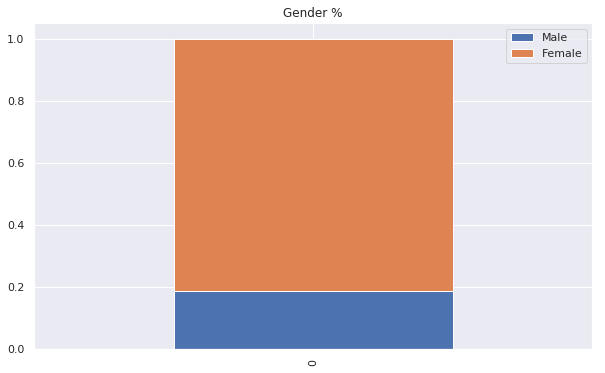

,Male,Female
Gender,0.187514,0.812486


In [54]:
df4 = df2[df2['ORGANICS']==1]

temp_list = [x for x in df4['Gender'] if x == 'M']
MA = len(temp_list)/len(df4)
temp_list = [x for x in df4['Gender'] if x == 'F']
FE = len(temp_list)/len(df4)

data = {'Male': [MA], 'Female': [FE]}
df5 = pd.DataFrame.from_dict(data)

df5.plot.bar(stacked=True, title ='Gender %',figsize=(10,6))
plt.show()
plt.close()

df5.rename(index={0: 'Gender'})

### Bin into groups for features AGE and Affluence Grade

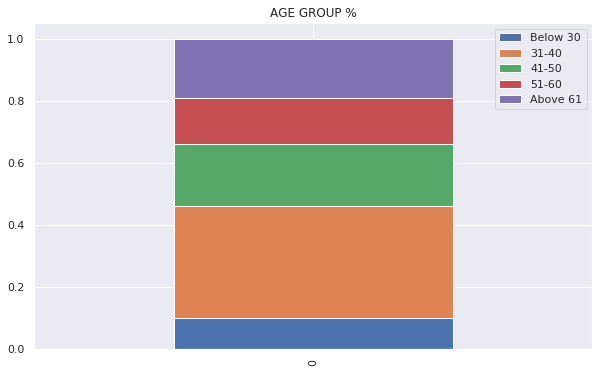

,Below 30,31-40,41-50,51-60,Above 61
AGE GROUP,0.100022,0.361178,0.198505,0.150143,0.190152


In [55]:
df4['AGE GRP'] = pd.cut(df4['Age'], [0, 31, 41, 51, 61, 101], labels=['Below 30', '31-40', '41-50', '51-60', 'Above 61'])

temp_list = [x for x in df4['AGE GRP'] if x == 'Below 30']
GP1 = len(temp_list)/len(df4)
temp_list = [x for x in df4['AGE GRP'] if x == '31-40']
GP2 = len(temp_list)/len(df4)
temp_list = [x for x in df4['AGE GRP'] if x == '41-50']
GP3 = len(temp_list)/len(df4)
temp_list = [x for x in df4['AGE GRP'] if x == '51-60']
GP4 = len(temp_list)/len(df4)
temp_list = [x for x in df4['AGE GRP'] if x == 'Above 61']
GP5 = len(temp_list)/len(df4)

data = {'Below 30': [GP1], '31-40': [GP2], '41-50':[GP3], '51-60':[GP4], 'Above 61':[GP5]}
df5 = pd.DataFrame.from_dict(data)

df5.plot.bar(stacked=True, title ='AGE GROUP %',figsize=(10,6))
plt.show()
plt.close()

df5.rename(index={0: 'AGE GROUP'})

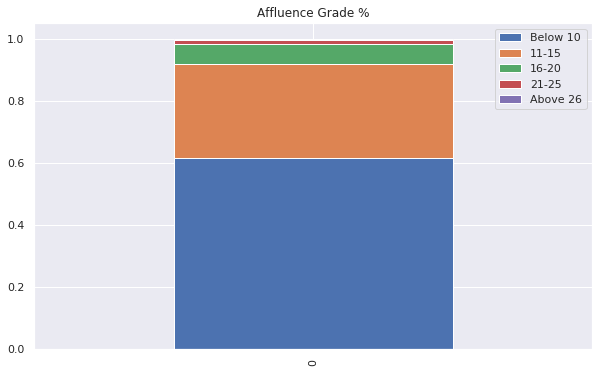

,Below 10,11-15,16-20,21-25,Above 26
AFFLUENCE GROUP,0.616619,0.301385,0.06375,0.014948,0.003297


In [56]:
df4['AFF GRP'] = pd.cut(df4['Affluence Grade'], [0, 11, 16, 21, 26, 40], labels=['Below 10', '11-15', '16-20', '21-25', 'Above 26'])

temp_list = [x for x in df4['AFF GRP'] if x == 'Below 10']
GP1 = len(temp_list)/len(df4)
temp_list = [x for x in df4['AFF GRP'] if x == '11-15']
GP2 = len(temp_list)/len(df4)
temp_list = [x for x in df4['AFF GRP'] if x == '16-20']
GP3 = len(temp_list)/len(df4)
temp_list = [x for x in df4['AFF GRP'] if x == '21-25']
GP4 = len(temp_list)/len(df4)
temp_list = [x for x in df4['AFF GRP'] if x == 'Above 26']
GP5 = len(temp_list)/len(df4)

data = {'Below 10': [GP1], '11-15': [GP2], '16-20':[GP3], '21-25':[GP4], 'Above 26':[GP5]}
df5 = pd.DataFrame.from_dict(data)

df5.plot.bar(stacked=True, title ='Affluence Grade %',figsize=(10,6))
plt.show()
plt.close()

df5.rename(index={0: 'AFFLUENCE GROUP'})

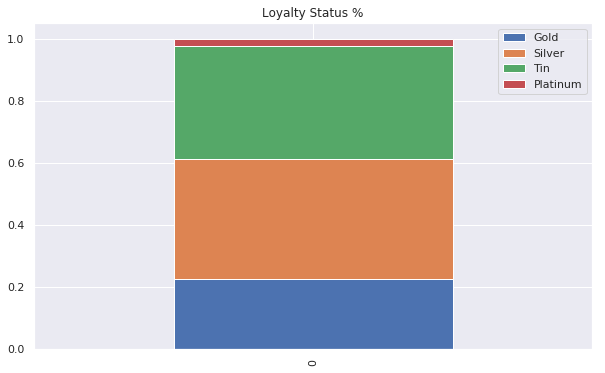

,Gold,Silver,Tin,Platinum
Loyalty Status,0.226863,0.386019,0.364696,0.022423


In [57]:
temp_list = [x for x in df4['Loyalty Status'] if x == 'Gold']
GO = len(temp_list)/len(df4)
temp_list = [x for x in df4['Loyalty Status'] if x == 'Silver']
SI = len(temp_list)/len(df4)
temp_list = [x for x in df4['Loyalty Status'] if x == 'Tin']
TI = len(temp_list)/len(df4)
temp_list = [x for x in df4['Loyalty Status'] if x == 'Platinum']
PL = len(temp_list)/len(df4)


data = {'Gold': [GO], 'Silver': [SI], 'Tin': [TI], 'Platinum': [PL]}
df5 = pd.DataFrame.from_dict(data)

df5.plot.bar(stacked=True, title ='Loyalty Status %',figsize=(10,6))
plt.show()
plt.close()

df5.rename(index={0: 'Loyalty Status'})

## Conclusion 

#### As we can see 'Gender', 'Age', 'Affluence Grade' and 'Loyalty Status' are important features in this dataset. And GradientBoosting GB is the best model as compare with the other models in the list.

#### Age between 31 and 40 year old, female, Affluence Grade below 10 and Tin Loyalty Status are the majority contribution to the contributer.

#### Suggest to focus on this group of customer and bundle to those products that this group of customer used to buy. And also displaying organics products with those products that this group of customer used to buy.